In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import h5py

## Comparison of head-based and pressure-based simulation
This scipt compares results from the SHEMAT-Suite testmodels *"fw_bas_Head_Pres"* and *"fw_pres_bas_Head_Pres"* for checking the functionality and equality of head-based and pressure-based fluid and heat flow simulation with SHEMAT-Suite.

In [2]:
# load results
HEAD = np.loadtxt("../result/ht_init_final_L1.dat")
PRES = np.loadtxt("../../fw_pres_bas_Head_Pres/result/pt_init_final_L1.dat")
PFIELD = h5py.File('../../fw_pres_bas_Head_Pres/result/p_init_final.h5', 'r')
HFIELD = h5py.File('../result/h_init_final.h5', 'r')

### Visual comparison of data log in the center of the model domain:

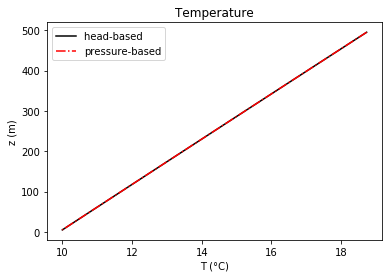

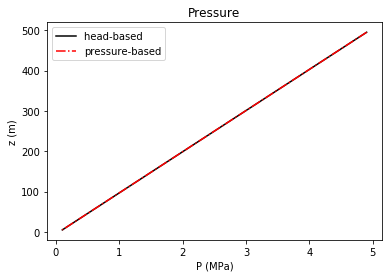

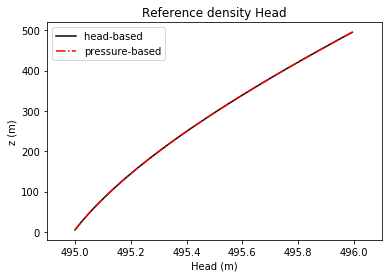

In [3]:
### create depth array #######
nd = 50
dz = 10
Z = [] # list of depth in m
depth = nd*dz-dz/2
Z.append(depth)
i = 1
while i < nd:
    depth = depth - dz
    Z.append(depth)
    i = i+1
##############################
### plot Temperature log #####
fig1 = plt.figure()
tplt = plt.plot(HEAD[:,0], Z[:], color='black', linestyle='-', label='head-based ')
tplt = plt.plot(PRES[:,0], Z[:], color='red', linestyle='-.', label='pressure-based')
plt.legend()
plt.title('Temperature')
plt.xlabel('T (°C)')
plt.ylabel('z (m)')
# save plot as figure
plt.savefig("tlog.png", dpi=300, format='png')
###############################
### plot Pressure log #########
fig2 = plt.figure()
hplt = plt.plot(HEAD[:,2]*1E-6, Z[:], color='black', linestyle='-', label='head-based ')
hplt = plt.plot(PRES[:,2]*1E-6, Z[:], color='red', linestyle='-.', label='pressure-based')
plt.legend()
plt.title('Pressure')
plt.xlabel('P (MPa)')
plt.ylabel('z (m)')
# save plot as figure
plt.savefig("plog.png", dpi=300, format='png')
###############################
# plot Reference Head log #####
fig3 = plt.figure()
hhead = np.double(HEAD[:,1])
hpres = np.double(PRES[:,1])
hplt = plt.plot(hhead, Z[:], color='black', linestyle='-', label='head-based ')
hplt = plt.plot(hpres, Z[:], color='red', linestyle='-.', label='pressure-based')
plt.xlim(494.9,496.1)
plt.legend()
plt.title('Reference density Head')
plt.xlabel('Head (m)')
plt.ylabel('z (m)')
# save plot as figure
plt.savefig("hlog.png", dpi=300, format='png')
plt.show()

### Numerical comparison of simulation results:
Ideally, head-based and pressure-based computation should show differences caused by numerical errors only. 

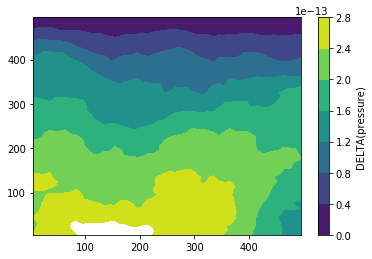

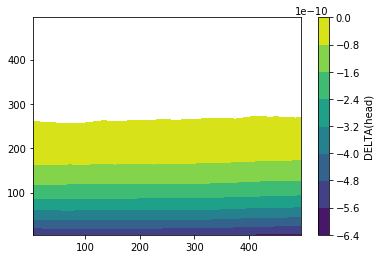

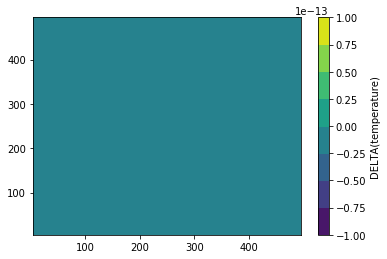

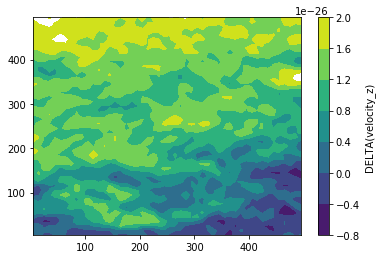

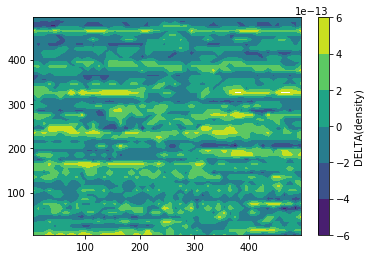

In [4]:
### prepare coordinates ######
nx = 50
nz = 50
xgrid = PFIELD['x']
x_coord = np.zeros((nz,nx))
x_coord[:,:] = xgrid[:,0,:]
zgrid = PFIELD['z']
z_coord = np.zeros((nz,nx))
z_coord[:,:] = zgrid[:,0,:]
##############################
##-PRESSURE-###
Prho_grid = PFIELD['pres']
Prho_slice = np.zeros((nz,nx))
Prho_slice = Prho_grid[:,0,:]
Hrho_grid = HFIELD['pres']
Hrho_slice = np.zeros((nz,nx))
Hrho_slice = Hrho_grid[:,0,:]
dif = Prho_slice - Hrho_slice
plt.figure
cp = plt.contourf(x_coord, z_coord, dif)#
cbar = plt.colorbar()
cbar.set_label('DELTA(pressure)')
plt.show()
##############################
##-HEAD-###
Prho_grid = PFIELD['head']
Prho_slice = np.zeros((nz,nx))
Prho_slice = Prho_grid[:,0,:]
Hrho_grid = HFIELD['head']
Hrho_slice = np.zeros((nz,nx))
Hrho_slice = Hrho_grid[:,0,:]
dif = Prho_slice - Hrho_slice
plt.figure
cp = plt.contourf(x_coord, z_coord, dif)#
cbar = plt.colorbar()
cbar.set_label('DELTA(head)')
plt.show()
##############################
##-TEMPERATURE-###
Prho_grid = PFIELD['temp']
Prho_slice = np.zeros((nz,nx))
Prho_slice = Prho_grid[:,0,:]
Hrho_grid = HFIELD['temp']
Hrho_slice = np.zeros((nz,nx))
Hrho_slice = Hrho_grid[:,0,:]
dif = Prho_slice - Hrho_slice
plt.figure
cp = plt.contourf(x_coord, z_coord, dif)#
cbar = plt.colorbar()
cbar.set_label('DELTA(temperature)')
plt.show()
##############################
##-VELOCITY-###
Prho_grid = PFIELD['vz']
Prho_slice = np.zeros((nz,nx))
Prho_slice = Prho_grid[:,0,:]
Hrho_grid = HFIELD['vz']
Hrho_slice = np.zeros((nz,nx))
Hrho_slice = Hrho_grid[:,0,:]
dif = Prho_slice - Hrho_slice
plt.figure
cp = plt.contourf(x_coord, z_coord, dif)#
cbar = plt.colorbar()
cbar.set_label('DELTA(velocity_z)')
plt.show()
##############################
##-DENSITY-###
Prho_grid = PFIELD['rhof']
Prho_slice = np.zeros((nz,nx))
Prho_slice = Prho_grid[:,0,:]
Hrho_grid = HFIELD['rhof']
Hrho_slice = np.zeros((nz,nx))
Hrho_slice = Hrho_grid[:,0,:]
dif = Prho_slice - Hrho_slice
plt.figure
cp = plt.contourf(x_coord, z_coord, dif)#
cbar = plt.colorbar()
cbar.set_label('DELTA(density)')
plt.show()